histogram for single (capital) variables



In [21]:
library(kernlab)
library(finalfit)
library(DataExplorer)
library(doBy)

Warning message:
"pakiet 'doBy' został zbudowany w wersji R 4.3.2"


In [11]:
options(repr.plot.width = 14, repr.plot.height = 9)

In [2]:
data(spam)

First glimpse at the data. There are no missing values. There are 57 numerical feature and 1 qualitative (target class). Frequencies are in range (0, 100) maximum frequency in data occurs for '3D' and is 42.8. Other numeric variables refer to specific capital characters features, that can take any value higher than 0 (observed max is 15841). For those types of variables std is much higher so we have to remember that in analysis. We can observe that for the frequencies even the third quartile is close to zero (for most of freqs it's even equal to 0), which means that a lot of features are equal to zero. The only ones above 1 are: 'you' - 2.6, 'your' - 1.3.  

In [4]:
ff_glimpse(spam)

Warning message:
"`fct_explicit_na()` was deprecated in forcats 1.0.0.
ℹ Please use `fct_na_value_to_level()` instead.
ℹ The deprecated feature was likely used in the finalfit package.
  Please report the issue at <https://github.com/ewenharrison/finalfit/issues>."


,label,var_type,n,missing_n,missing_percent,mean,sd,min,quartile_25,median,quartile_75,max
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
make,make,<dbl>,4601,0,0.0,0.1,0.3,0.0,0.0,0.0,0.0,4.5
address,address,<dbl>,4601,0,0.0,0.2,1.3,0.0,0.0,0.0,0.0,14.3
all,all,<dbl>,4601,0,0.0,0.3,0.5,0.0,0.0,0.0,0.4,5.1
num3d,num3d,<dbl>,4601,0,0.0,0.1,1.4,0.0,0.0,0.0,0.0,42.8
our,our,<dbl>,4601,0,0.0,0.3,0.7,0.0,0.0,0.0,0.4,10.0
over,over,<dbl>,4601,0,0.0,0.1,0.3,0.0,0.0,0.0,0.0,5.9
remove,remove,<dbl>,4601,0,0.0,0.1,0.4,0.0,0.0,0.0,0.0,7.3
internet,internet,<dbl>,4601,0,0.0,0.1,0.4,0.0,0.0,0.0,0.0,11.1
order,order,<dbl>,4601,0,0.0,0.1,0.3,0.0,0.0,0.0,0.0,5.3


num457 is highly correlated with num857 (even mre than num85), generally we don't observe big correlations between a lot of variables, what's interesting, no feature is highly correlated with target class

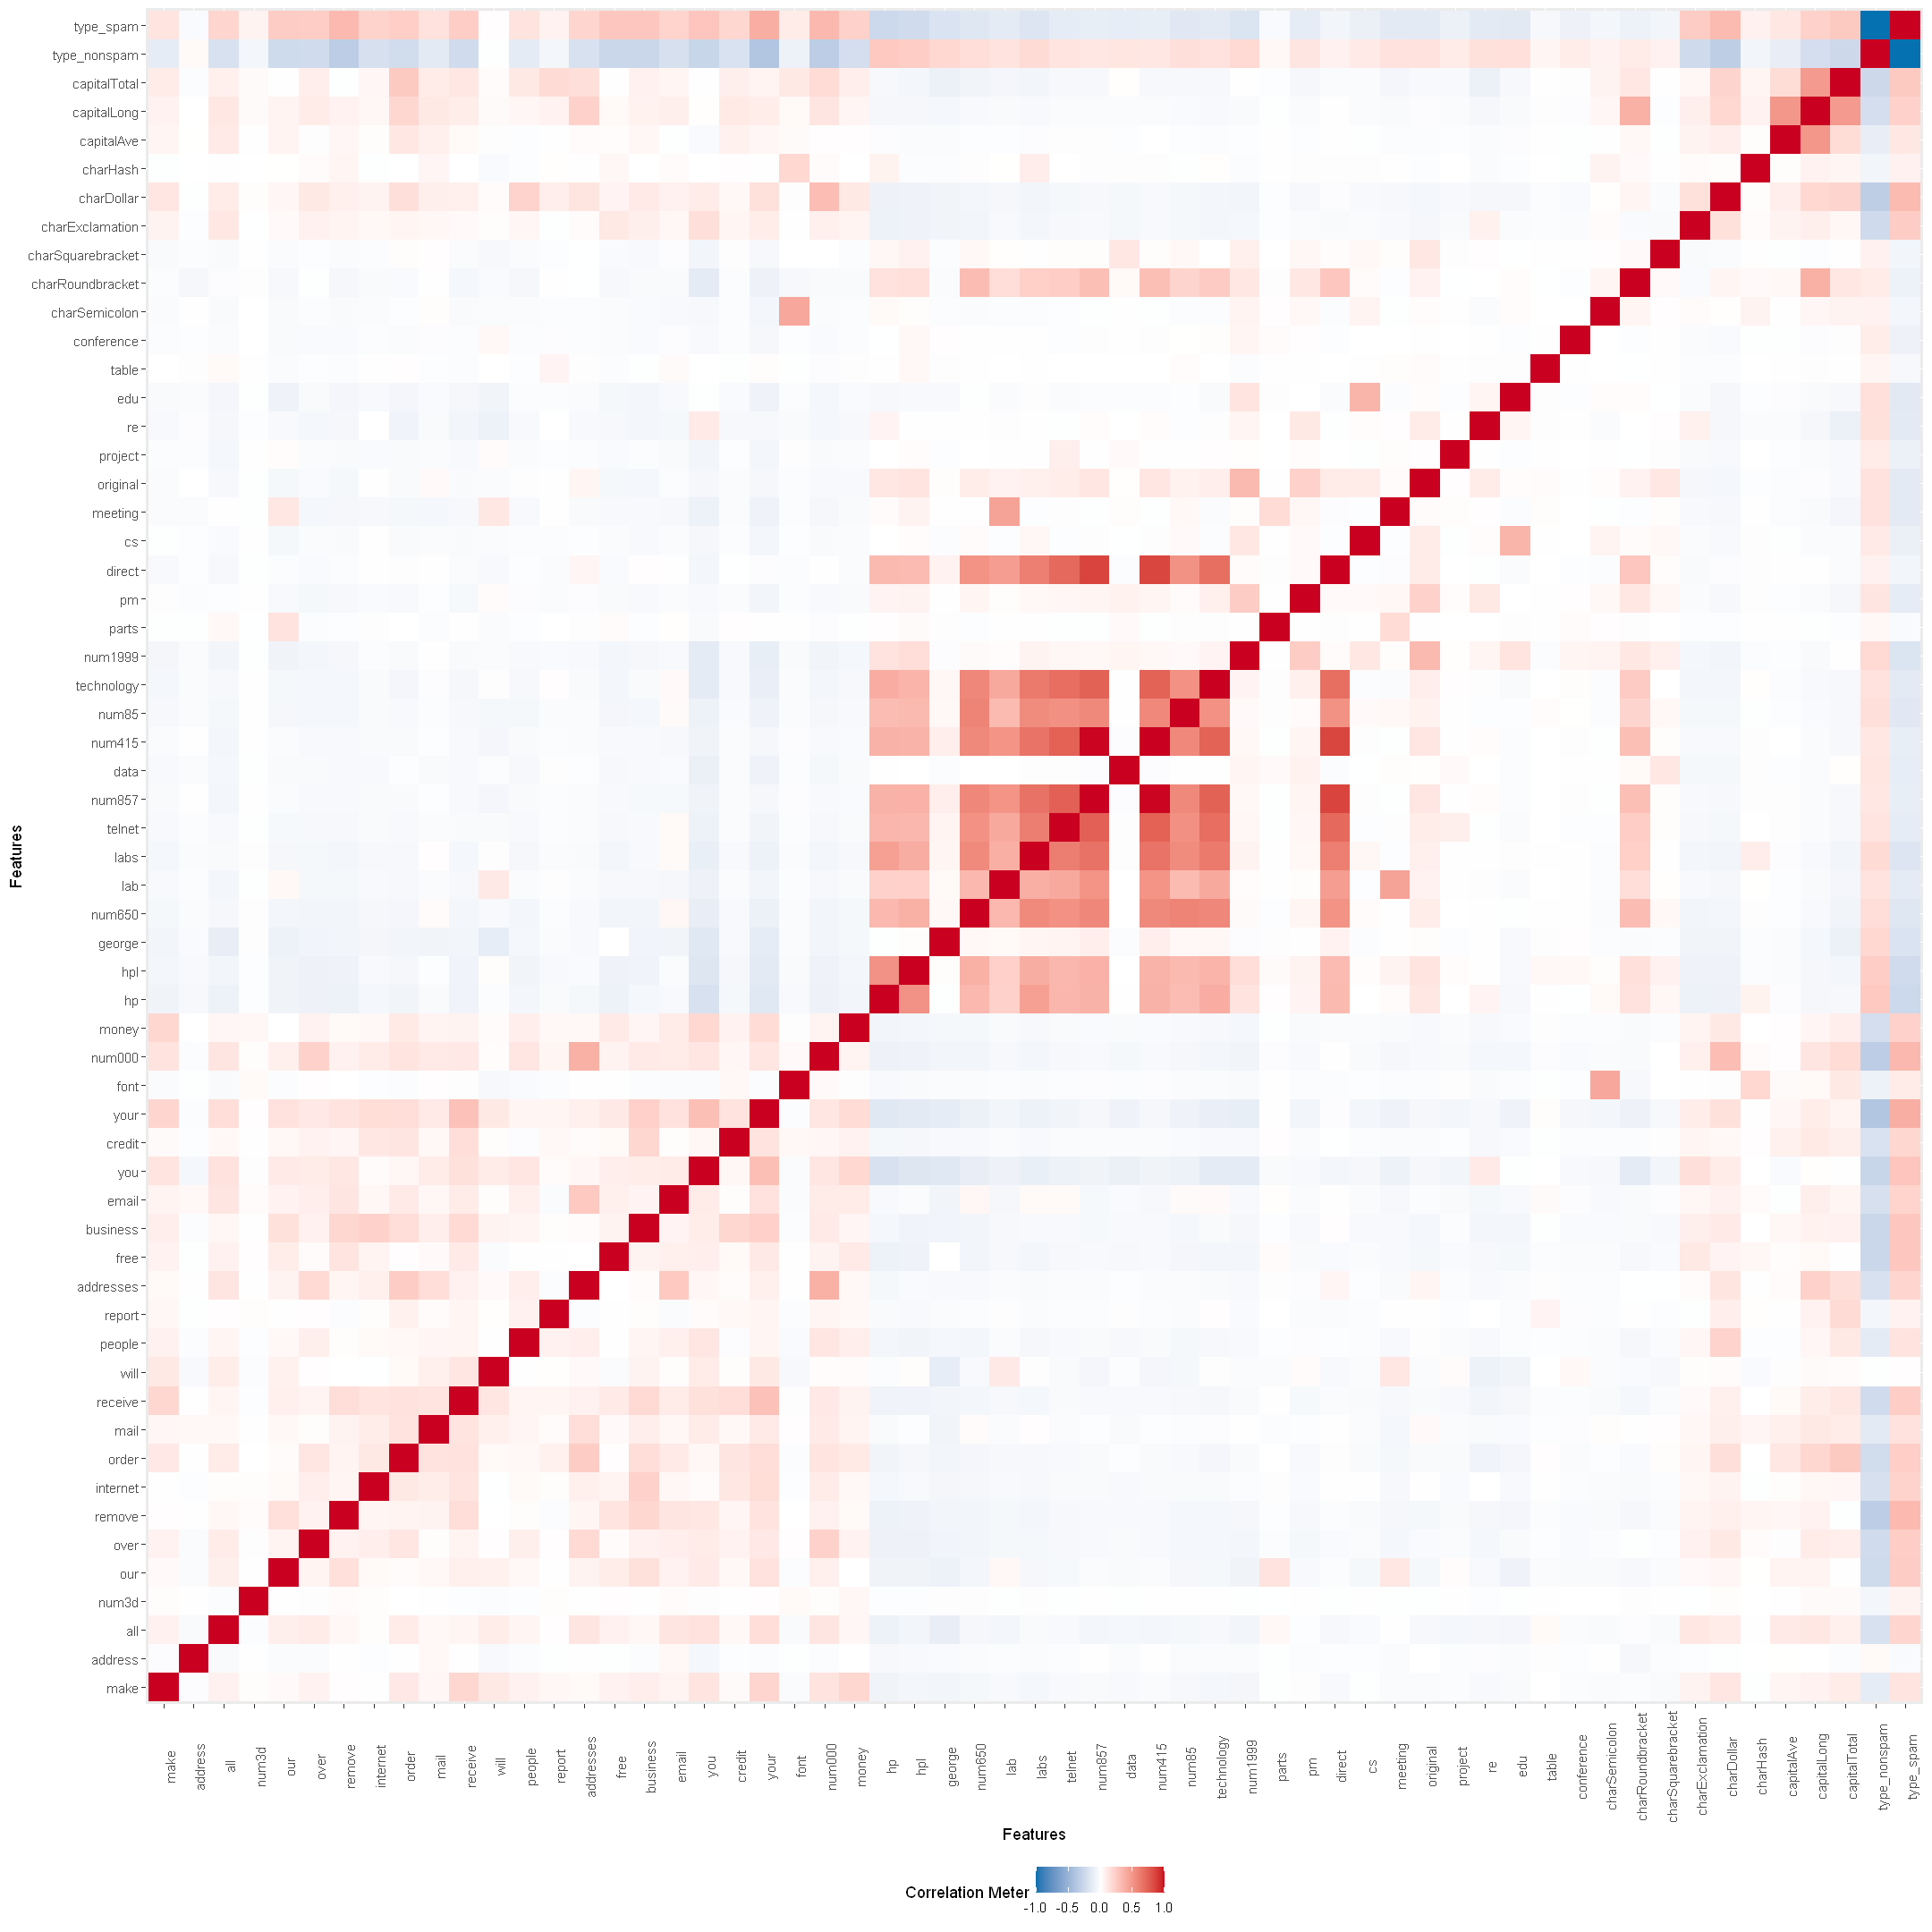

In [15]:
options(repr.plot.width = 18, repr.plot.height = 18)
plot_correlation(spam)

In [14]:
options(repr.plot.width = 14, repr.plot.height = 14)

In [25]:
cor_matrix <- cor(spam[, 1:57])

## To fix 

finding variables with highest correlation. Finding variables with highest correlation with type (boxplots for most and least correlated)

In [27]:
upper_triangle <- cor_matrix[upper.tri(cor_matrix, diag = FALSE)]
rows <- rownames(cor_matrix)
cols <- colnames(cor_matrix)

In [32]:
sorted_ind <- order(cor_matrix, decreasing = TRUE)
largest <- sorted_ind[1:5]
largest_2d <- arrayInd(largest, dim(cor_matrix))

In [34]:
upper_triangle

[1] -1.675947e-02  6.562677e-02 -3.352568e-02  1.327323e-02 -6.923213e-03
   [6] -2.024623e-02  2.311863e-02 -2.375991e-02  7.773450e-02  3.238151e-03
  [11]  5.967434e-02 -2.483983e-02  8.756390e-02 -1.001416e-02  5.405363e-02
  [16]  7.668553e-03  3.917741e-03  3.667704e-02  1.978375e-02  1.473357e-01
  [21]  6.116316e-02 -3.949887e-03 -1.627968e-02  1.200260e-02  1.026807e-02
  [26]  2.959773e-02  7.956131e-02  4.454546e-02  1.062630e-01 -3.825736e-03
  [31]  9.378632e-02 -2.454365e-03  2.082331e-02  1.174378e-01  5.078613e-02
  [36]  1.053015e-01  4.119770e-02  3.296190e-02  3.207489e-02 -4.947178e-03
  [41]  3.449508e-02  1.389723e-02  5.680869e-02  8.312904e-02  1.306236e-01
  [46]  1.884586e-01 -6.863822e-03  4.825447e-02 -1.297636e-02  6.838166e-02
  [51]  5.389969e-02  1.595779e-01  1.284955e-01  1.377595e-01  1.253192e-01
  [56]  1.058010e-01 -4.039772e-02  8.321004e-02 -1.922134e-02  6.678842e-02
  [61]  9.263601e-03 -1.461360e-03 -2.973291e-03  3.034357e-02  7.115699e-02
  [66]  1.182586e-01  6.643818e-02 -1.885826e-02  4.759277e-02 -1.319931e-02
  [71]  3.112625e-02  7.763058e-02  1.329521e-02  2.627376e-02  3.473815e-02
  [76]  4.573659e-02  4.920308e-02  3.998100e-03  3.678049e-02 -9.206465e-03
  [81]  8.552243e-03  1.200822e-02  3.445187e-03  9.673016e-03 -2.272270e-02
  [86]  1.242575e-02  6.683982e-02  1.790087e-02  4.668721e-02  6.614267e-03
  [91]  6.368327e-02  2.843879e-02  5.329821e-03  1.221128e-01  2.706545e-03
  [96]  5.617656e-02  1.730663e-01  4.290367e-02  7.278158e-02  2.384361e-01
 [101]  1.605433e-01  6.471776e-02  2.315182e-02  7.973022e-02 -1.800197e-02
 [106]  5.938565e-02 -9.116845e-03  6.390624e-02  7.432062e-03  8.302445e-02
 [111]  1.986548e-02  1.284355e-01  5.111519e-02  8.269248e-03  2.560123e-02
 [116]  9.871116e-02 -2.869885e-02  4.401843e-03  2.946664e-03  6.123384e-04
 [121]  8.192807e-02 -1.837026e-02  3.626166e-02  3.470033e-03  1.434433e-01
 [126]  6.413675e-02  1.879814e-01  2.164223e-01  1.583899e-01  8.136307e-02
 [131]  1.741982e-01  5.540864e-02  4.921815e-02  1.399553e-02  1.933862e-02
 [136]  5.575273e-02  5.332353e-02  3.349985e-02  1.219233e-01  1.939140e-02
 [141]  6.234426e-02  7.835041e-02  1.220113e-01  3.773789e-02  9.880437e-02
 [146]  3.597719e-02  8.964107e-02  1.290065e-02  7.094217e-02 -2.806529e-02
 [151]  2.544886e-01  7.200693e-02  4.963034e-02  1.282432e-01 -5.547602e-02
 [156]  1.393294e-01 -1.083363e-02  9.851019e-02  9.550478e-02  1.117923e-01
 [161]  2.064065e-02  3.901665e-02  9.350860e-02  1.417804e-01  8.804534e-02
 [166]  1.187214e-01  1.808652e-02  4.002872e-02  8.189655e-02  8.498254e-02
 [171]  9.458027e-02  2.129452e-02 -1.580602e-02  3.111142e-02 -5.381368e-03
 [176]  3.152622e-02  5.897916e-02  4.613406e-02  1.091631e-01  1.232169e-01
 [181]  3.085932e-02  1.557692e-01  1.223873e-02 -1.679772e-02  3.293975e-02
 [186]  1.651585e-02  2.766472e-02  1.909480e-01  1.293913e-02  3.784158e-02
 [191]  1.970486e-01 -1.819087e-02  1.566512e-01  8.175854e-03  1.366050e-01
 [196]  1.068331e-01  1.307943e-01  1.569051e-01  1.591120e-01  9.807180e-02
 [201]  2.948259e-01  1.056311e-01  4.908919e-02  4.385390e-02  7.339319e-02
 [206]  1.028149e-01  2.218315e-01  1.379535e-01  3.049858e-01  1.330620e-01
 [211] -2.434872e-02 -8.849766e-03 -3.568120e-02  2.810247e-02 -2.020748e-02
 [216]  7.956433e-03 -2.093479e-03 -1.619226e-02 -1.964783e-02  8.200227e-03
 [221] -1.048875e-02 -4.503150e-02 -2.997805e-02 -1.945779e-02 -4.291166e-03
 [226] -6.884866e-03 -2.104508e-02 -2.649561e-02 -2.368140e-02  3.388446e-02
 [231] -2.136104e-02  1.340721e-01 -2.050160e-02  1.236707e-01  1.136760e-02
 [236]  7.003715e-02  2.114547e-01  6.479546e-02  8.922586e-02  1.268002e-01
 [241]  9.680912e-02  1.063245e-01  1.600663e-02  1.191155e-01  4.435373e-02
 [246]  3.695881e-01  5.539758e-02  9.728434e-02  9.249772e-02  1.159053e-01
 [251]  4.107698e-02  1.185330e-01  2.316547e-02  1.881552e-01  1.983771e-03
 [256]  4.114528e-02  3.536010e-02  3.938589e-05  5.932943e-02  3.057460e-02

# Outliers

Find variables with value higher than 1,5 IQR in every column